In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#display max cols
pd.pandas.set_option('display.max_columns',None)

In [6]:
dataset=pd.read_csv('train.csv')

In [7]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
print(dataset.shape)

(1460, 81)


###here we start data analysis


In [10]:
print([dataset.columns])

[Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDriv

In [11]:
ftr_na=[ftr for ftr in dataset.columns if dataset[ftr].isnull().sum()>1]

In [12]:
for ftr in ftr_na:
    print(ftr,":        " ,np.round(dataset[ftr].isnull().mean(),4),  '% missing values')

LotFrontage :         0.1774 % missing values
Alley :         0.9377 % missing values
MasVnrType :         0.0055 % missing values
MasVnrArea :         0.0055 % missing values
BsmtQual :         0.0253 % missing values
BsmtCond :         0.0253 % missing values
BsmtExposure :         0.026 % missing values
BsmtFinType1 :         0.0253 % missing values
BsmtFinType2 :         0.026 % missing values
FireplaceQu :         0.4726 % missing values
GarageType :         0.0555 % missing values
GarageYrBlt :         0.0555 % missing values
GarageFinish :         0.0555 % missing values
GarageQual :         0.0555 % missing values
GarageCond :         0.0555 % missing values
PoolQC :         0.9952 % missing values
Fence :         0.8075 % missing values
MiscFeature :         0.963 % missing values


In [13]:
#since there are missing values, we need to find if there is any relationship between missing values and dependent feature

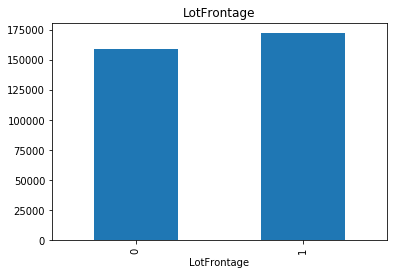

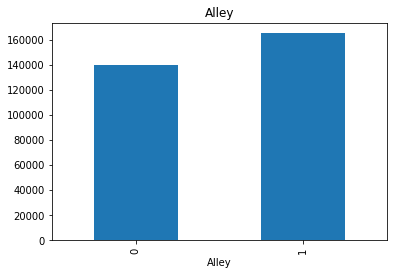

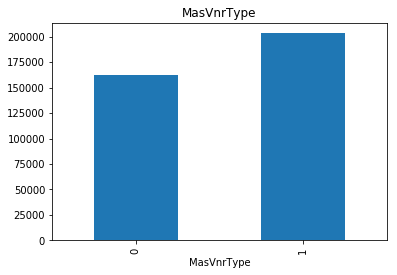

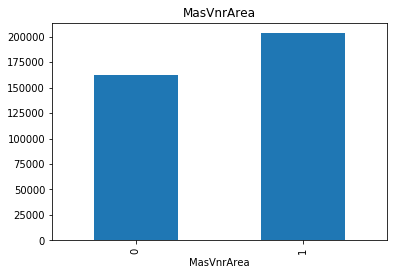

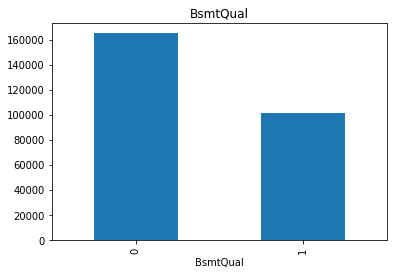

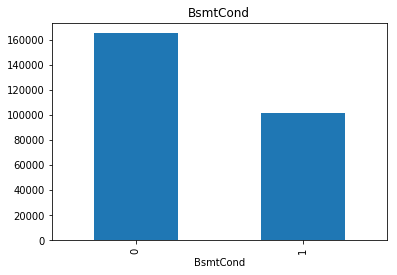

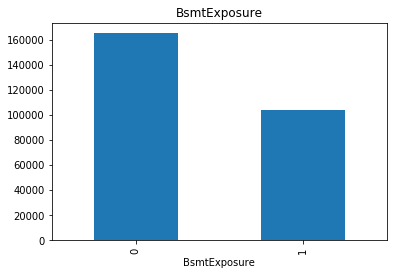

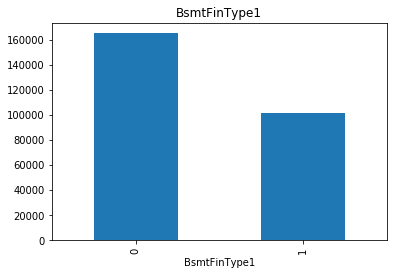

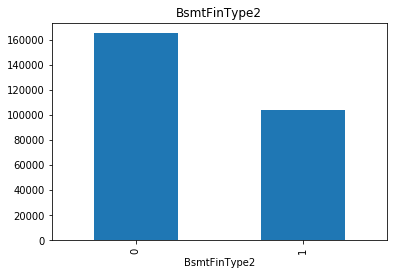

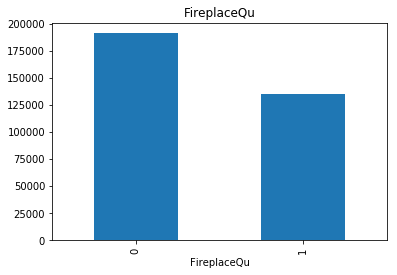

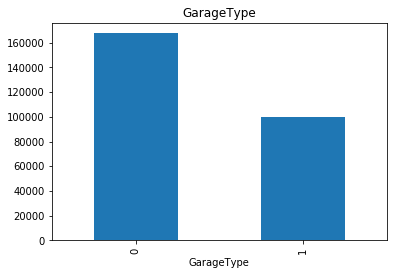

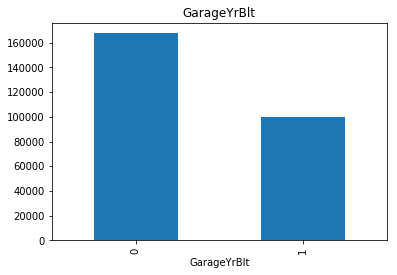

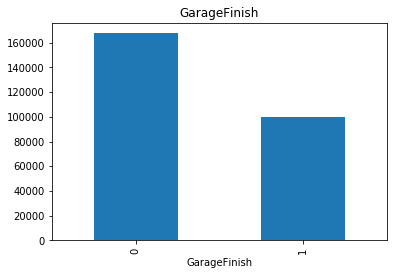

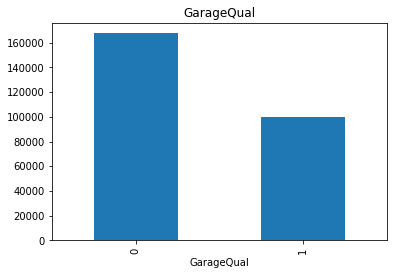

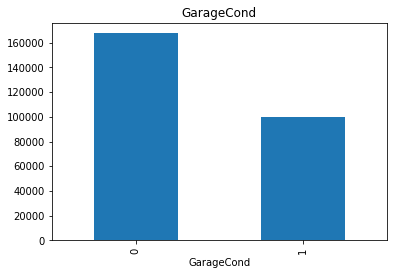

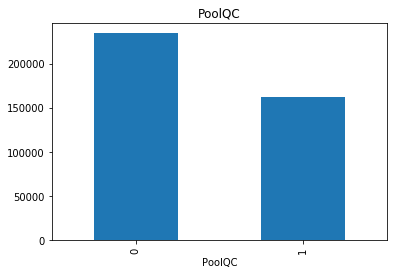

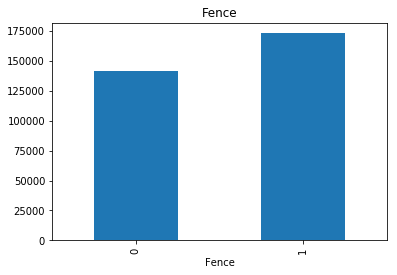

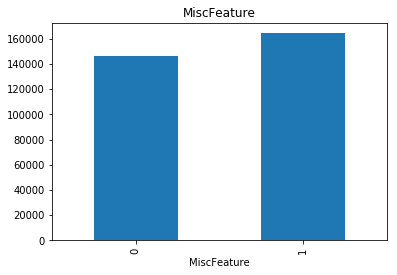

In [14]:
for ftr in ftr_na:
    data=dataset.copy()
    data[ftr]=np.where(data[ftr].isnull(),1,0)
    data.groupby(ftr)['SalePrice'].median().plot.bar()
    plt.title(ftr)
    plt.show()

In [15]:
#We have to use feature engineering to replace nan values with proper values.

num_ftr=[ftr for ftr in dataset.columns if dataset[ftr].dtypes!='O']
print(num_ftr)
print(len(num_ftr))

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
38


In [16]:
print(dataset.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [17]:
yr_ftr=[ftr for ftr in dataset.columns if 'Yr' in ftr or 'Year' in ftr]
print(yr_ftr)

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


In [18]:
for ftr in yr_ftr:
    print(ftr,'\n',dataset[ftr].unique())

YearBuilt 
 [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd 
 [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt 
 [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962.

Text(0, 0.5, 'Median house price')

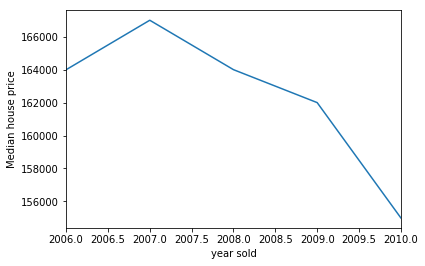

In [19]:
dataset.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel("year sold")
plt.ylabel("Median house price")
#plt.show()

#the above information is false as year increases the price should increase.So we need to handle it

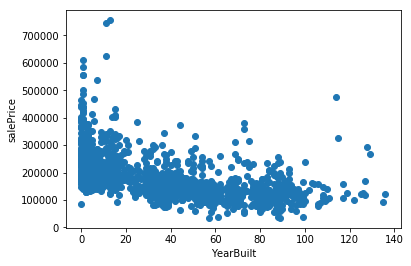

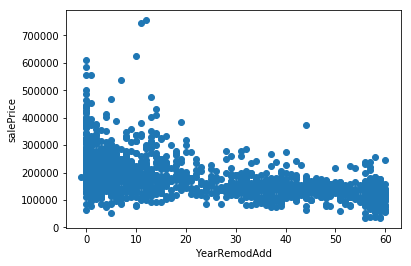

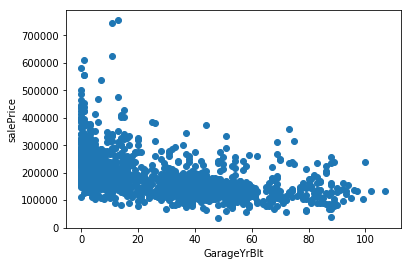

In [20]:
for ftr in yr_ftr:
    if ftr!='YrSold':
        data=dataset.copy()
        data[ftr]=data['YrSold']-data[ftr]  #this gives more info. like age of house, age of modification to house etc
       # print(ftr,'\n',data[ftr])
        plt.scatter(data[ftr],data['SalePrice'])
        plt.xlabel(ftr)
        plt.ylabel('salePrice')
        plt.show()

In [21]:
#Numerocal variables are of 2 types:
#continous and discrete variables
disc_ftr=[ftr for ftr in num_ftr if len(dataset[ftr].unique())<25 and ftr not in yr_ftr+['Id']]
print(disc_ftr)

['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold']


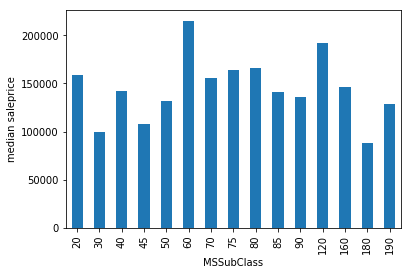

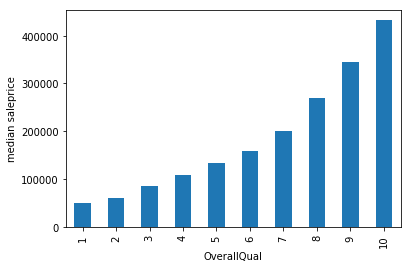

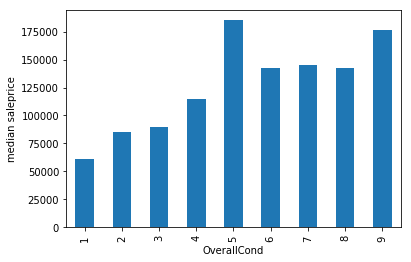

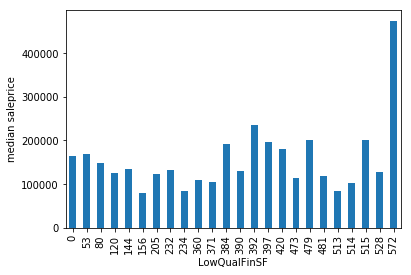

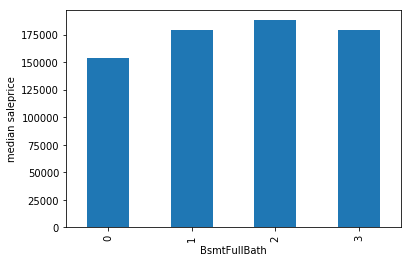

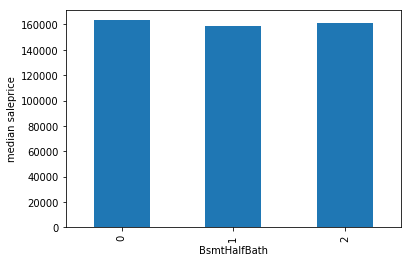

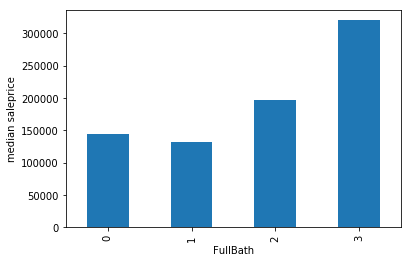

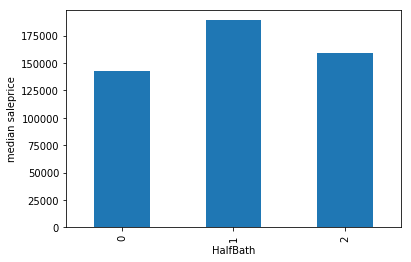

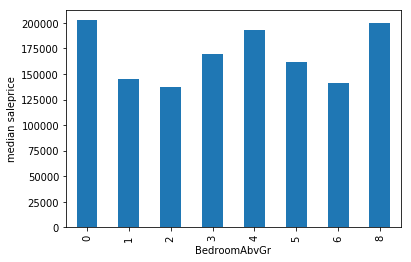

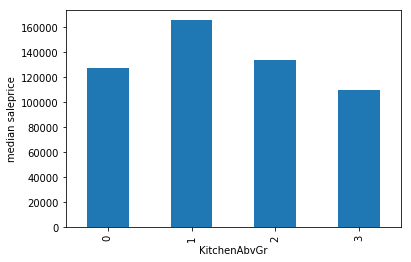

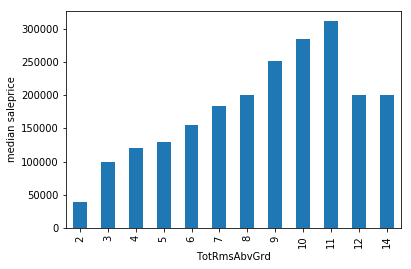

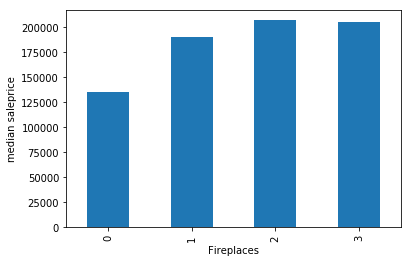

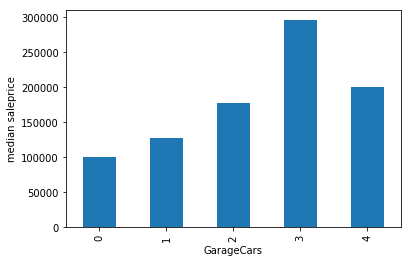

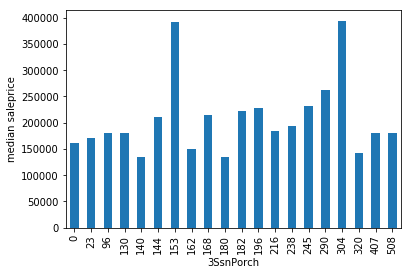

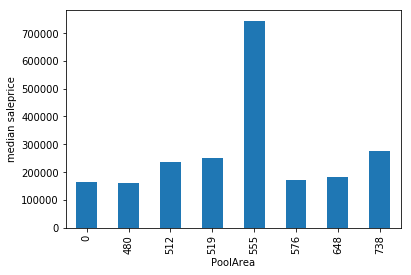

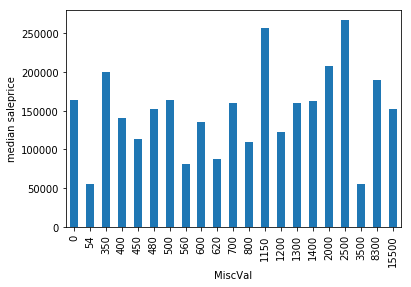

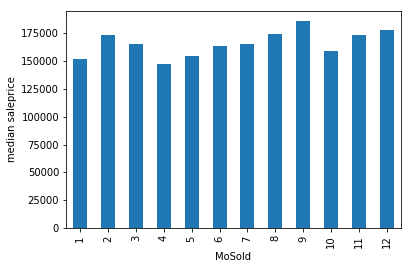

In [29]:
#Finding relationship between discrete varialbles and sales price

for ftr in disc_ftr:
    data=dataset.copy()
    data.groupby(ftr)['SalePrice'].median().plot.bar()
    plt.ylabel('median saleprice')
    plt.xlabel(ftr)
    plt.show()

In [24]:
#Till now we handled temporal variables(data-time) and discrete var,
#now lets consider the continous variables in Numerical variable
cont_ftr=[ftr for ftr in num_ftr if ftr not in disc_ftr+yr_ftr+['Id']]
print(cont_ftr)

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']


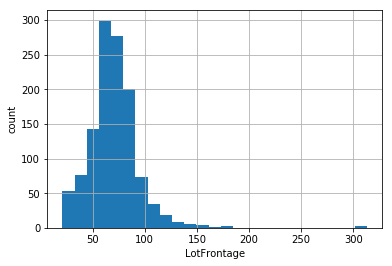

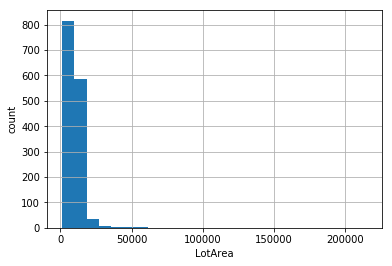

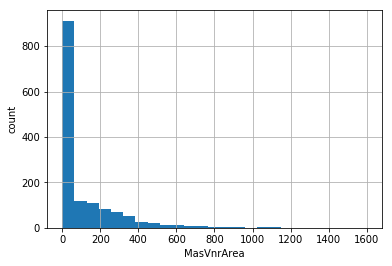

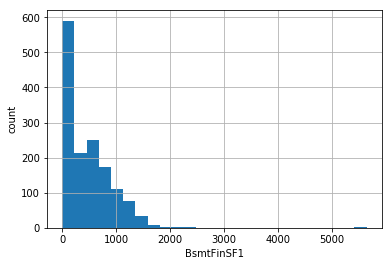

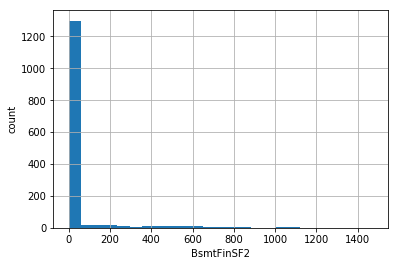

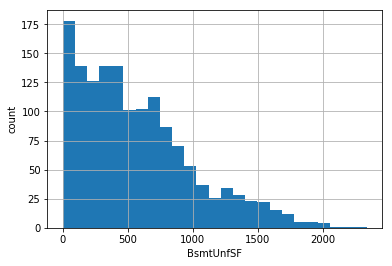

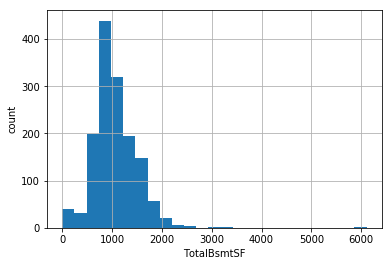

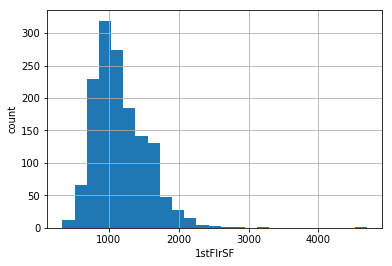

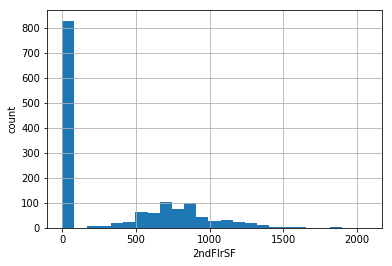

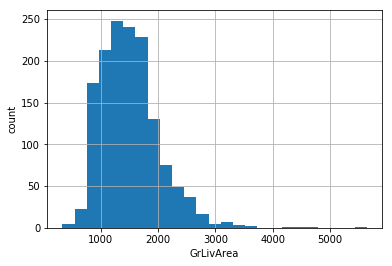

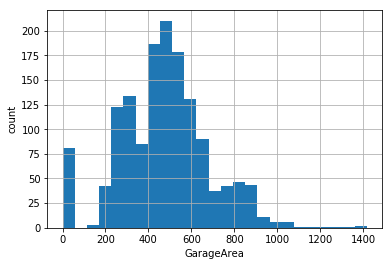

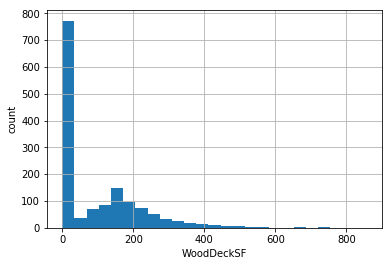

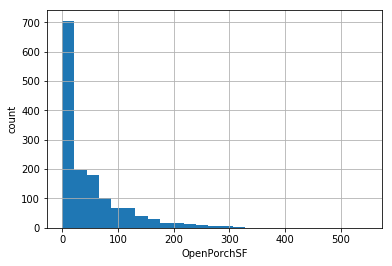

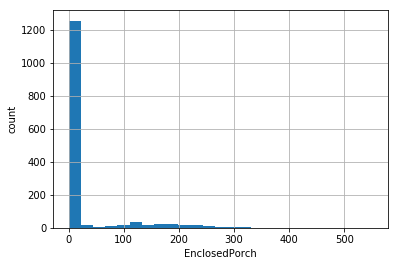

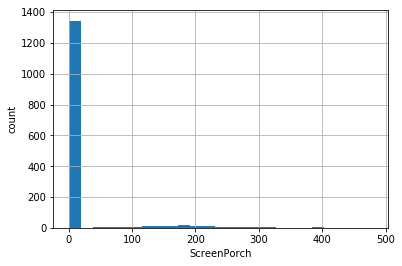

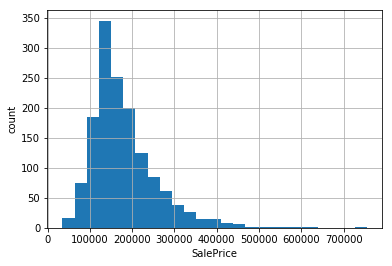

In [30]:
#we can analyze cont. variables by using histogram
for ftr in cont_ftr:
    data=dataset.copy()
    data[ftr].hist(bins=25)
    plt.xlabel(ftr)
    plt.ylabel('count')
    plt.show()

#for the above histograms, except last feature everything else is not 'normal distribution'.So we have to make it gaussian or normal distribution

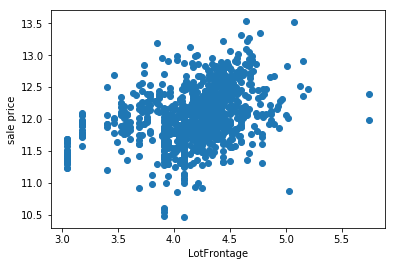

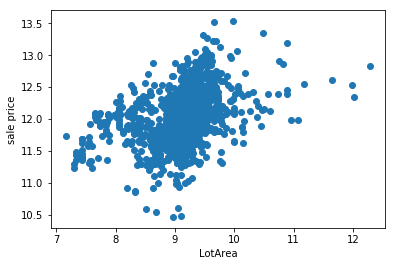

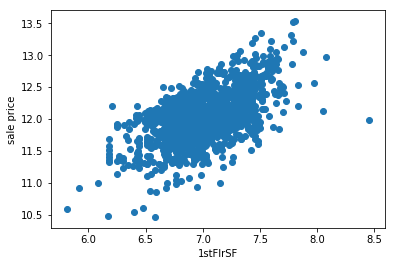

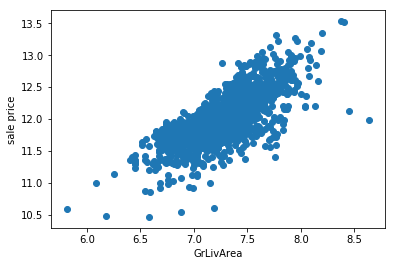

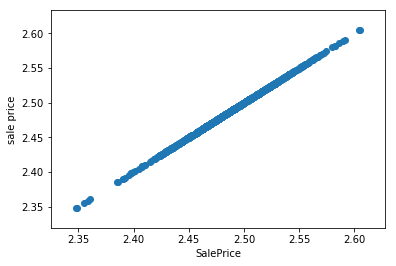

In [34]:
#so we have to apply logarthmic transformation

for ftr in cont_ftr:
    data=dataset.copy()
    if 0 in data[ftr].unique():
        pass
    else:
        data[ftr]=np.log(data[ftr])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[ftr],data['SalePrice'])
        plt.xlabel(ftr)
        plt.ylabel('sale price')
        plt.show()
        
        
#here we get monotonic relationship, that is as x increases , y value also increases

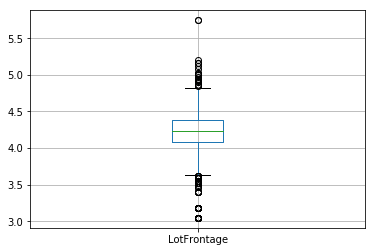

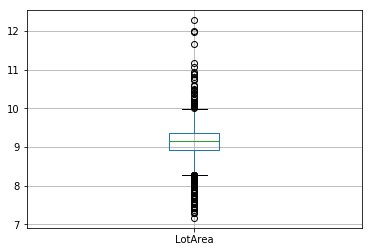

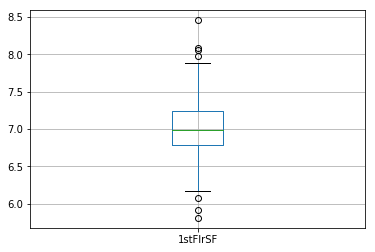

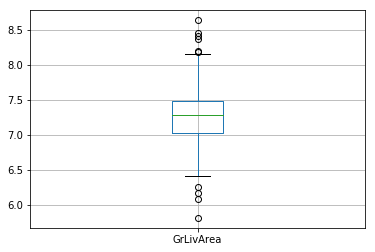

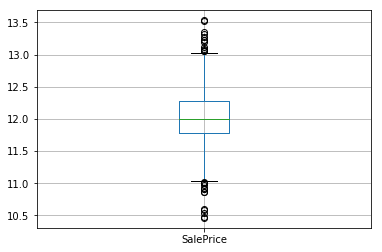

In [35]:
for ftr in cont_ftr:
    data=dataset.copy()
    if 0 in data[ftr].unique():
        pass
    else:
        data[ftr]=np.log(data[ftr])
        data.boxplot(column=ftr)
        plt.show()

In [45]:
# now we consider categorical feature:
cat_ftr=[ftr for ftr in dataset.columns if dataset[ftr].dtype=='O']
print(cat_ftr)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [46]:
for ftr in cat_ftr:
    print('Feature is {} and no of categories are {}'.format(ftr,dataset[ftr].unique()))

Feature is MSZoning and no of categories are ['RL' 'RM' 'C (all)' 'FV' 'RH']
Feature is Street and no of categories are ['Pave' 'Grvl']
Feature is Alley and no of categories are [nan 'Grvl' 'Pave']
Feature is LotShape and no of categories are ['Reg' 'IR1' 'IR2' 'IR3']
Feature is LandContour and no of categories are ['Lvl' 'Bnk' 'Low' 'HLS']
Feature is Utilities and no of categories are ['AllPub' 'NoSeWa']
Feature is LotConfig and no of categories are ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
Feature is LandSlope and no of categories are ['Gtl' 'Mod' 'Sev']
Feature is Neighborhood and no of categories are ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Feature is Condition1 and no of categories are ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Feature is Condition2 and n

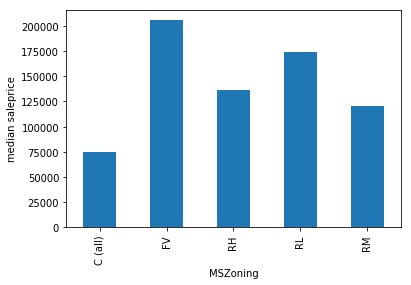

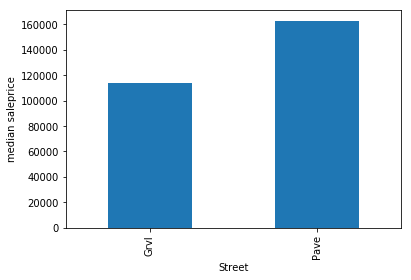

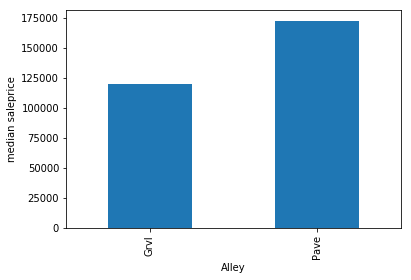

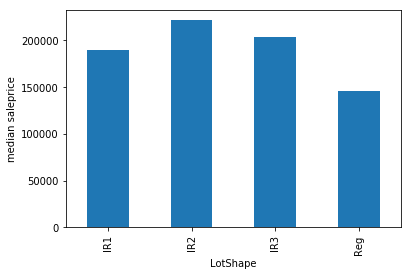

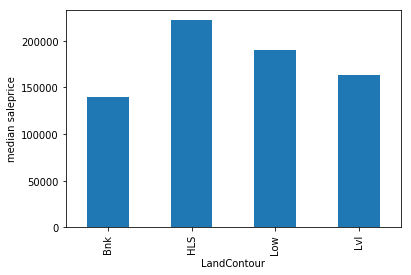

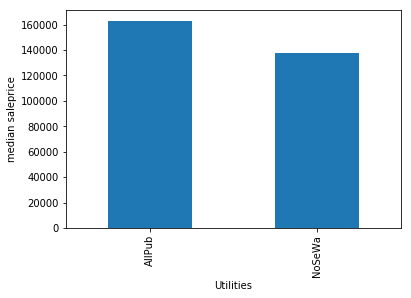

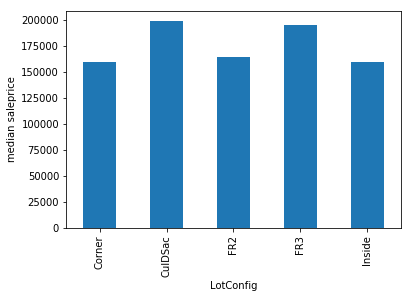

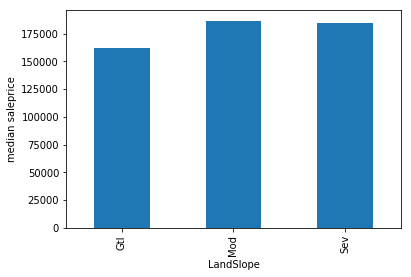

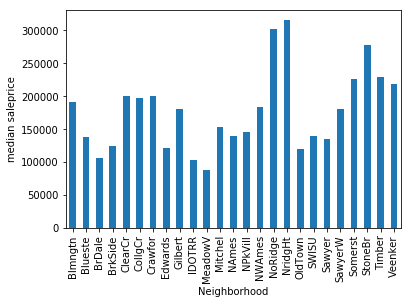

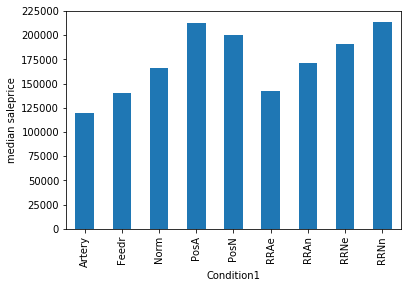

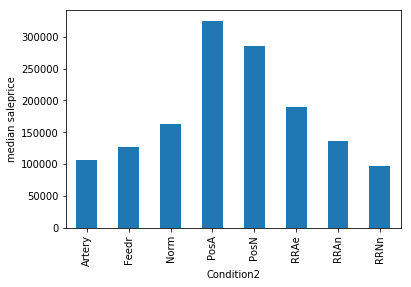

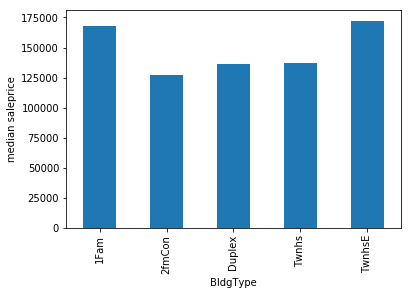

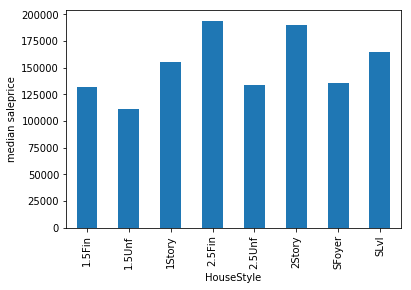

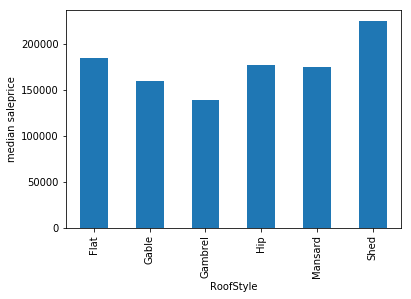

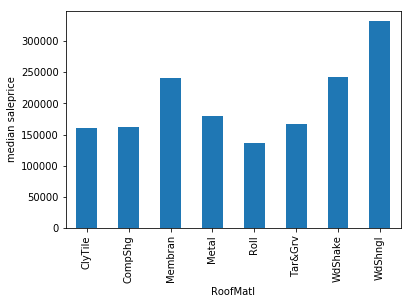

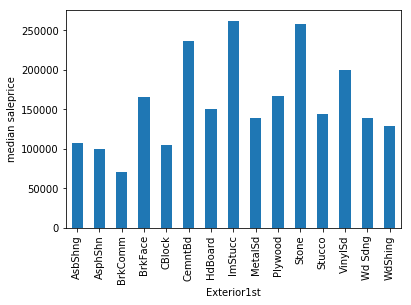

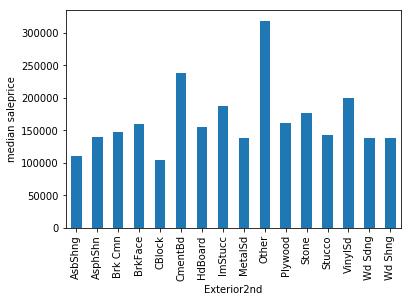

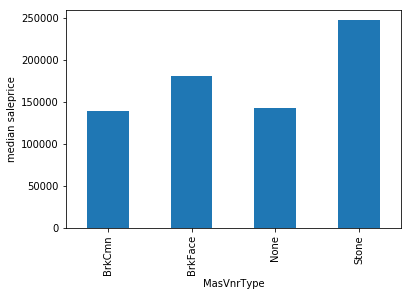

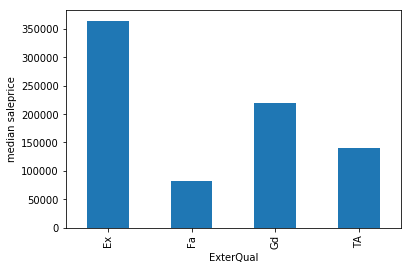

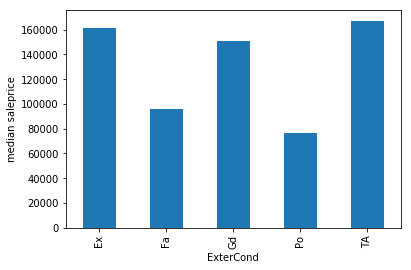

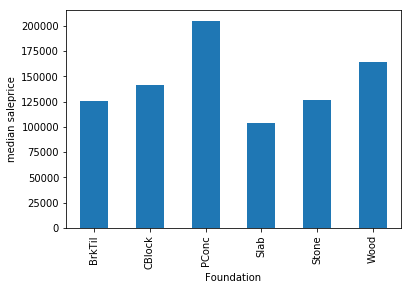

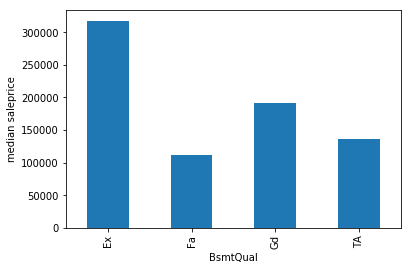

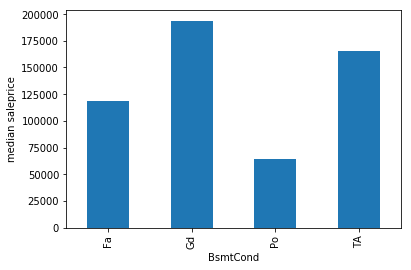

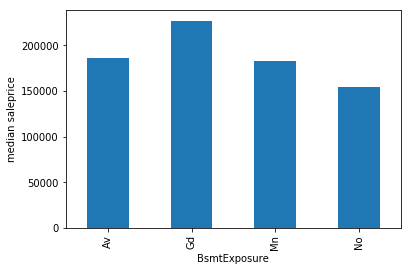

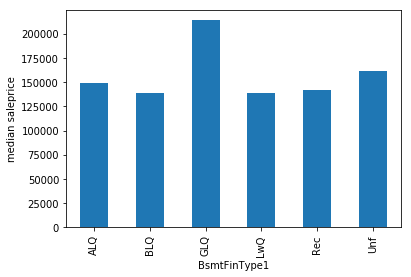

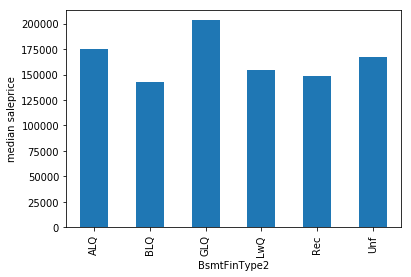

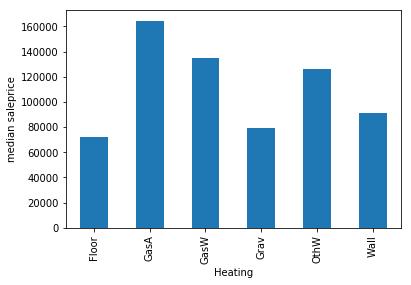

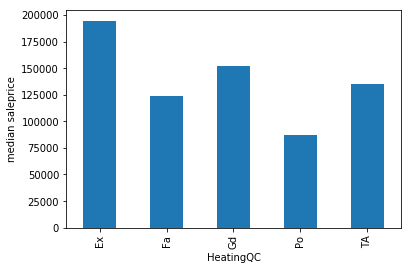

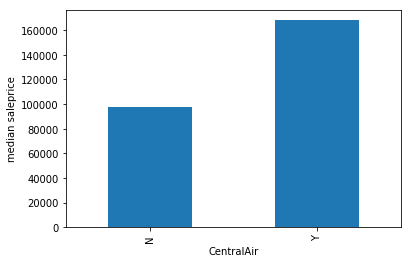

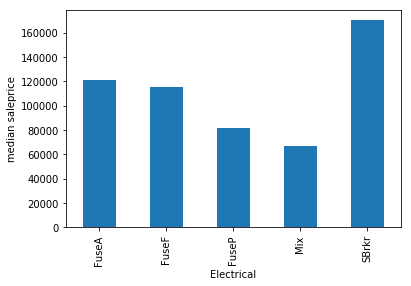

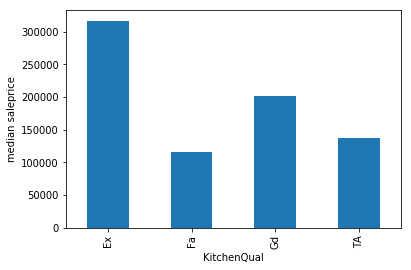

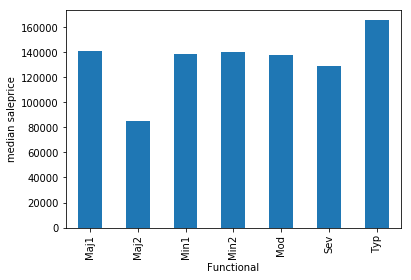

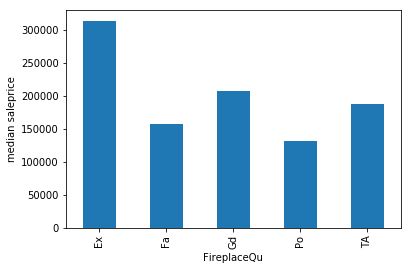

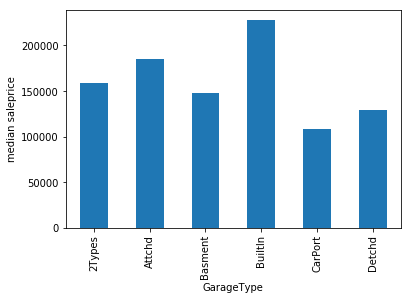

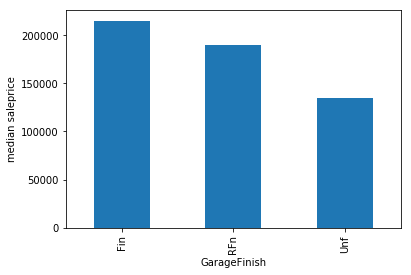

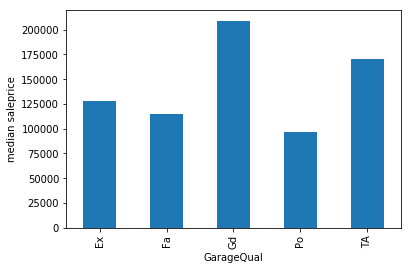

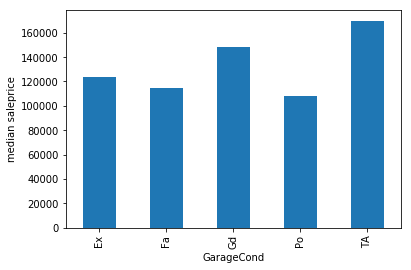

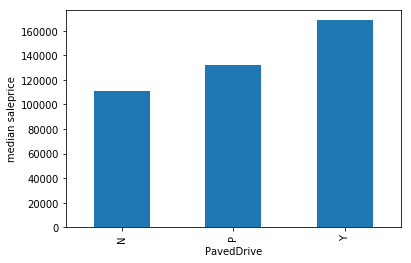

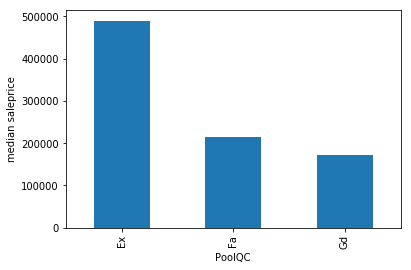

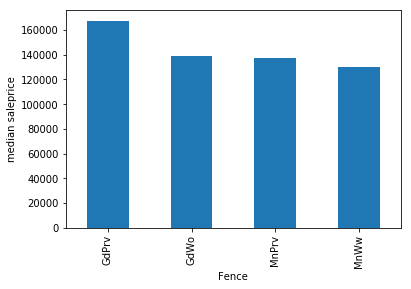

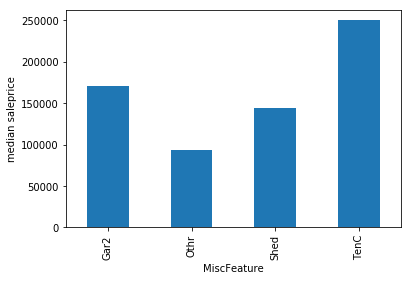

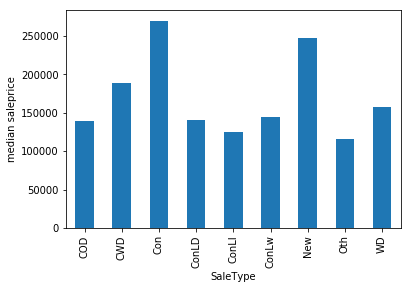

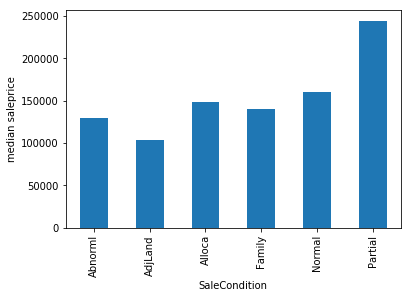

In [52]:
for ftr in cat_ftr:
    data=dataset.copy()
    data.groupby(ftr)['SalePrice'].median().plot.bar()  #we use median , as data contains lots of outliers
    plt.xlabel(ftr)
    plt.ylabel('median saleprice')
    plt.show()
    